In [3]:
import pandas as pd
import pylab, math
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.font_manager as fm
zhfont = fm.FontProperties(fname='msyh.ttf')
import re
import collections 
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')
import os

In [20]:
%matplotlib inline

In [4]:
os.chdir('./kuaishou-solution')

In [5]:
delay = pd.read_csv('./video_process_delay.csv')
retain = pd.read_csv('user_retention.csv')

In [6]:
delay.head(8)

,user,video,delay
0,3,0,2275
1,3,1,839
2,5,2,119
3,6,3,70
4,9,4,66
5,10,5,198
6,11,6,348
7,12,7,93


In [7]:
retain.head(8)

,user,retain
0,0,1
1,1,1
2,2,0
3,3,1
4,4,1
5,5,0
6,6,0
7,7,1


In [9]:
print('delay columns:', delay.columns)
print('delay dimension', delay.shape[1])
print('retain columns:', retain.columns)
print('retain dimension', retain.shape[1])

delay columns: Index(['user', 'video', 'delay'], dtype='object')
delay dimension 3
retain columns: Index(['user', 'retain'], dtype='object')
retain dimension 2


In [10]:
delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 282801 entries, 0 to 282800
Data columns (total 3 columns):
user     282801 non-null int64
video    282801 non-null int64
delay    282801 non-null int64
dtypes: int64(3)
memory usage: 6.5 MB


In [16]:
# 平均每个用户看多少个video
delay['video'].size / len(delay['user'].unique())

1.6740126438414547

In [25]:
# 每个用户看video个数的分布
video_num = delay.groupby('user')['video'].count()

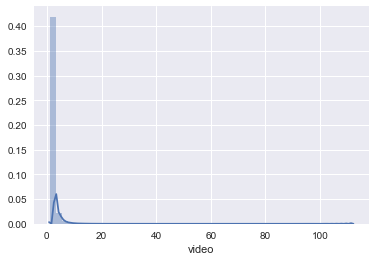

In [26]:
sns.distplot(video_num)

In [39]:
user_video_num = delay.groupby('user')['video'].count().to_frame().reset_index()

In [40]:
whole_df = pd.merge(retain, user_video_num, how='inner')

In [42]:
import numpy as np

In [46]:
np.corrcoef(whole_df.video.values, whole_df.retain.values)[0,1]

0.17273025014150678

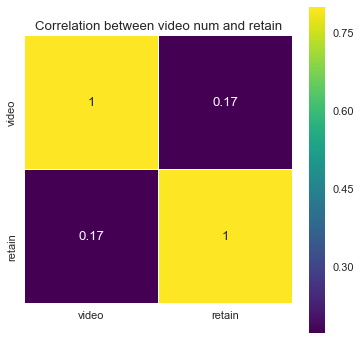

In [59]:
corrMatrix=whole_df[['video', 'retain']].corr()
sns.set(font_scale=1.10)
plt.figure(figsize=(6, 6))
sns.heatmap(corrMatrix, vmax=.8, linewidths=0.01,
            square=True,annot=True,cmap='viridis',linecolor="white")
plt.title('Correlation between video num and retain');